In [1]:
# audio signal parameters
"""
number of channels
sample width
framerate/sample_rate
number of frames
values of a frame
"""
import wave
obj = wave.open("patrix.wav", "rb")
print("Number of channels:", obj.getnchannels(),
     "sample width:", obj.getsampwidth(),
     "frame rate:", obj.getframerate(),
     "Number of frame:", obj.getnframes())
print("parametwers:", obj.getparams())
print("duration in s:",int(obj.getnframes()/obj.getframerate()))

frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames))
obj.close()

Number of channels: 1 sample width: 2 frame rate: 16000 Number of frame: 80000
parametwers: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=80000, comptype='NONE', compname='not compressed')
duration in s: 5
<class 'bytes'> <class 'int'>
160000


In [6]:
# duplicate the .wav file and save it
obj_new = wave.open("pa_new2.wav", "wb")
obj_new.setnchannels(2)
obj_new.setsampwidth(2)
obj_new.setframerate(44100.0)
obj_new.writeframes(frames)
obj_new.close()

16000
80000
5.0 seconds
(80000,)


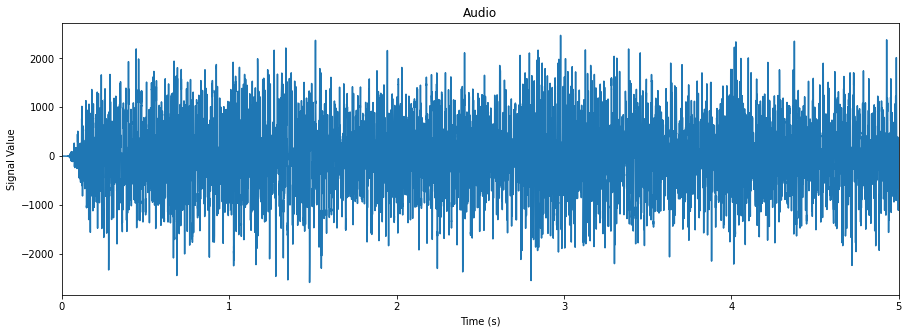

In [22]:
# one channel: mono, two channels: stereo
import wave
import numpy as np
import matplotlib.pyplot as plt

wav_obj = wave.open('patrix.wav', 'rb')

sample_freq = wav_obj.getframerate()
print(sample_freq)

n_samples = wav_obj.getnframes()
print(n_samples)

t_audio = n_samples/sample_freq
print(t_audio, "seconds")

signal_wave = wav_obj.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
print(signal_array.shape)

# for stereo:
#l_channel = signal_array[0::2]
#r_channel = signal_array[1::2]

times = np.linspace(0, n_samples/sample_freq, num=n_samples)

plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title('Audio')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

In [ ]:
import pyaudio
import wave

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
p = pyaudio.Pyaudio()

# start recording
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=FRAMES_PER_BUFFER)
print("start recording.....")
frames = []
seconds = 5
for i in range(0, int(RATE / FRAMES_PER_BUFFER * seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.apend(data)
print("recoding stopped")

stream.stop_stream()
stream.close()
p.terminate()

# save the .wav file
wf = wave.open("output.wav", 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframe(b''.join(frames))
wf.close()

In [13]:
# linear neural network
%matplotlib inline
import math
import time
import numpy as np

In [4]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [5]:
class A:
    def __init__(self):
        self.b = 1
a = A()

In [6]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)
a.do()

Class attribute "b" is 1


In [2]:
from d2l import torch as d2l

In [1]:
import torch

In [5]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [4]:
class Timer:
    def __init__(self):
        self.times = []
        self.start()
    def start(self):
        self.tik = time.time()
    def stop(self):
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    def avg(self):
        return sum(self.times) / len(self.times)
    def sum(self):
        return sum(self.times)
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()

In [6]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.08446 sec'

In [9]:
timer.start()
d = a+b
f'{timer.stop():.5f} sec'

'0.00018 sec'

In [10]:
# to calculate the normal distrubution
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x-mu)**2)

In [11]:
x = np.arange(-7, 7, 0.01)
# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x.asnumpy(), [normal(x, mu, sigma).asnumpy() for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

AttributeError: 'numpy.ndarray' object has no attribute 'asnumpy'

In [4]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [29]:
import numpy as np
array1 = np.array([1,2,4,6])
array2 = np.array([2,4,5,7])
print(np.setdiff1d(array1,array2)) 
print(np.setxor1d(array1,array2)) 

[1 6]
[1 5 6 7]


In [38]:
import pandas as pd
data=[5,7,3,7,2,9]
print(type(data))
print(pd.unique(data))
type(pd.unique(data))

<class 'list'>
[5 7 3 2 9]


numpy.ndarray

In [5]:
# 06-29
import numpy as np
a = np.array([[1,3],[2,4]])
print(a)
# print("========")
print(a.flatten()) 
# print(a.flatten(order='C')) 
# print(a.flatten(order='F')) 
print(np.ravel(a))

[[1 3]
 [2 4]]
[1 3 2 4]
[1 3 2 4]


# MXNET

In [15]:
print("a+b")

a+b


In [4]:
from mxnet import np, npx
npx.set_np()

In [5]:
# floats by default
x=np.arange(12)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [6]:
# x.shape
x.size # the total number of elements in an array

12

In [7]:
X=x.reshape(3,4) # or x.reshape(-1,4),(3,-1)
X

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [8]:
np.zeros((2,3,4)) # two 2 by 3 matrix

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [2]:
np.ones((2,3,4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [3]:

np.random.normal(0,1, size=(3,4))

array([[ 1.1630787 ,  2.2122064 ,  0.4838046 ,  0.7740038 ],
       [ 0.29956347,  1.0434403 ,  0.15302546,  1.1839255 ],
       [-1.1688148 ,  1.8917114 ,  1.5580711 , -1.2347414 ]])

In [4]:

x = np.array([1,2,4,8])
y = np.array([2,2,2,2])
x+y,x-y,x*y,x**y

(array([ 3.,  4.,  6., 10.]),
 array([-1.,  0.,  2.,  6.]),
 array([ 2.,  4.,  8., 16.]),
 array([ 1.,  4., 16., 64.]))

In [14]:
x

array([1., 2., 4., 8.])

In [9]:

X = np.arange(12).reshape(3, 4)
Y = np.array([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
np.concatenate([X,Y], axis=0), np.concatenate([X,Y], axis=1)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]]),
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [10]:

X==Y

array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [11]:
#通过逻辑运算符构建二元张量
X.sum()

array(66.)

# Broadcasting mechanism

In [16]:
a = np.arange(3).reshape(3,1)
b = np.arange(2).reshape(1,2)
a,b

(array([[0.],
        [1.],
        [2.]]),
 array([[0., 1.]]))

In [18]:

a+b

array([[0., 1.],
       [1., 2.],
       [2., 3.]])

In [19]:
X

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [23]:
X[0:2, :] # the first, and the second rows

array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]])

In [30]:
A = X.asnumpy()
B = np.array(X)
type(A), type(b)

(numpy.ndarray, mxnet.numpy.ndarray)

In [52]:
a = np.array([3.5])
a, a.item(), float(a), int(a)

(array([3.5]), 3.5, 3.5, 3)

In [26]:
x = np.array([1,2,4,8])
y = np.array([2,2,2,2])
x + y, x - y, x * y, x / y, x ** y

(array([ 3.,  4.,  6., 10.]),
 array([-1.,  0.,  2.,  6.]),
 array([ 2.,  4.,  8., 16.]),
 array([0.5, 1. , 2. , 4. ]),
 array([ 1.,  4., 16., 64.]))

In [25]:
np.exp(x)

array([1.0000000e+00, 2.7182817e+00, 7.3890562e+00, 2.0085537e+01,
       5.4598148e+01, 1.4841316e+02, 4.0342880e+02, 1.0966332e+03,
       2.9809580e+03, 8.1030840e+03, 2.2026465e+04, 5.9874141e+04])

In [33]:
X = np.arange(12).reshape(3,4)
Y = np.array([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
np.concatenate([X,Y], axis=0), np.concatenate([X,Y], axis=1)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]]),
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

# Pytorch

In [2]:
import torch

In [3]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [7]:
# we create a CSV file below ../data/house_tiny.csv
import os
os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file = os.path.join('..','data','house_tiny.csv')
with open(data_file, 'w')as f:
    f.write('''NumRomms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,14000''')

# Data Preprocessing

In [11]:
# pandas replaced all CSV entries with value NA with a special NaN (not a number) value.
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRomms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN   14000


In [24]:
inputs, targets = data.iloc[:,0:2],data.iloc[:,2]
inputs = pd.get_dummies(inputs,dummy_na=True)
print(inputs)

   NumRomms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1


In [25]:
inputs = inputs.fillna(inputs.mean()) #impute/fill the NaN/missing entries with the mean value
print(inputs)

   NumRomms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


# conversion to tensor format

In [26]:
X,y = torch.tensor(inputs.values), torch.tensor(targets.values)
X,y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100,  14000]))

In [36]:
# exercise
df = pd.read_csv('Geotechnical Data for roof fall rate prediction.csv')
df.tail()

,CMRR,BOLT_LENGTH_ft,BOLT_TENSION,BOLT_GROUT_COLUMN,BOLT_CAPACITY_Kips,BOLTS_PER_ROW,ROW_SPACING_ft,ENTRY_WIDTH_ft,PRSUP,INTERSECTION_DIAGONAL_ft,DEPTH_of_COVER_ft,MINING_HEIGHT_ft,DRIVAGE_10000_ft,No._of_3WAY,No._of_4Way,No._of_SEGMENTS,FALLS_3W,FALLS_4W,SEGMENT_FALLS,ROOF_FALL_RATE
104,49,3.0,0,3,26.5,4,4.0,20.0,3.98,57.0,200,3.0,0.1,0,16,32.0,0,0,0.0,0.00
105,49,3.0,0,3,26.5,4,4.0,20.0,3.98,63.0,200,3.0,0.8,23,43,120.5,0,0,0.0,0.00
106,60,4.0,0,3,18.6,4,4.0,16.0,4.65,60.0,400,4.3,17.4,216,1215,2754.0,0,0,1.0,0.06
107,39,6.0,0,3,18.6,4,4.0,16.0,6.98,60.0,400,4.3,5.5,81,294,709.5,0,1,1.0,0.36
108,40,5.0,0,3,18.6,4,4.0,16.0,5.81,60.0,400,4.3,16.8,186,1601,3481.0,3,16,11.0,1.79


# linear algebra

In [32]:
# scalar
x1 = torch.tensor(3.0)
y1 = torch.tensor(2.0)
x1

tensor(3.)

In [7]:
# we might associate each applicant with a vector whose components correspond to quantities like their income
# length of employment, or number of previous defaults (vectors)
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [14]:
A = torch.arange(12).reshape(4,3)
A

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [15]:
# he transpose of an m×n matrix is an n×m matrix
A.T # columns by rows

tensor([[ 0,  3,  6,  9],
        [ 1,  4,  7, 10],
        [ 2,  5,  8, 11]])

In [17]:
# Symmetric matrices are the subset of square matrices that are equal to their own transposes
A =  torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
A ==A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [1]:
# Aug 11
import torch
A =  torch.arange(6, dtype=torch.float32).reshape(2,3)
B = A.clone() # Assign a copy of `A` to `B` by allocating new memory
A,A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [26]:
# The elementwise product of two matrices is called their Hadamard product
A*B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [28]:
a=2
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [29]:
a+X

tensor([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],

        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]])

In [6]:
A.sum(axis=1) # axis=0 means suming elements by columns 

tensor([ 3., 12.])

In [3]:
# reduction
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [53]:
torch.numel(A)

6

In [3]:
A =  torch.arange(6, dtype=torch.float32).reshape(2,3)

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [12]:
A

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [13]:
 # sum up elements by columns--axis=0
A.sum(axis=1) # sum up elements by rows

tensor([ 3., 12.])

In [45]:
A.sum(axis=[0,1])==A.sum()

tensor(True)

In [10]:
# non-reduction sum
sum_A = A.sum(axis=1, keepdims=True)
sum_A,sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [14]:
# the broadcasting invokes when their shapes do not match up eg. 2,3 and 2,1
A / sum_A # the resulting shape is as A, greater dimension

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [18]:
# to calculate the cumulative sum of elements 
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [4]:
# dot products
x = torch.arange(3, dtype=torch.float32)
y = torch.ones(3, dtype = torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [6]:
x,y

(tensor([0., 1., 2.]), tensor([1., 1., 1.]))

In [5]:
A,x #??

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([0., 1., 2.]))

In [22]:
A.shape,x.shape, torch.mv(A,x),A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [7]:
# matrix-matrix multiplication
import torch
B = torch.ones(3,4)
torch.mm(A,B),A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [8]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [10]:
torch.abs(u).sum()

tensor(7.)

In [7]:
import numpy as np
# from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [8]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

NameError: name 'f' is not defined

In [1]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)
x.grad

In [3]:
y = 2 * torch.dot(x,x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [4]:
x.grad == 4*x

tensor([True, True, True, True])

In [6]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [7]:
x.grad.zero_()
y = x*x
y.backward(gradient=torch.ones(len(y)))
x.grad

tensor([0., 2., 4., 6.])

In [12]:
x.grad.zero_() # reset the gradient
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [1]:
import torch

In [2]:
from torch.distributions import multinomial

In [3]:
from d2l import torch as d2l

In [4]:
%matplotlib inline

In [14]:
fair_probs = torch.ones([6])/6
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 2., 2., 0., 2., 2.])

In [15]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts /1000

tensor([0.1560, 0.1530, 0.1680, 0.1850, 0.1700, 0.1680])